# air-bnb-data-analysis

Use the "Run" button to execute the code.

> Mistakes to avoid:
    <ul>
    <li>Don't jump into analysis.</li>
    <li>Use df.info() and df.describe() to find proper satisfactory real world values.</li>
    <li>Carefully handle the data types and make necessary conversions to data using Pandas.</li>
    </ul>

### Import packages and installs.

In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import jovian

In [3]:
!pip install jovian opendatasets --upgrade --quiet

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import opendatasets as od

### Kaggle Dataset link (use your username and API key to download)

In [6]:
dataset_url = 'https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata' 

In [7]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sankhadeepkundu
Your Kaggle Key: ········


100%|██████████| 10.5M/10.5M [00:00<00:00, 63.4MB/s]

#### Verifying download:

In [8]:
data_dir = './airbnbopendata'
import os
os.listdir(data_dir)

['Airbnb_Open_Data.csv']

### Loading the dataset:

In [9]:
airbnb_df = pd.read_csv('airbnbopendata/Airbnb_Open_Data.csv')
airbnb_df

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN


**Unable to deal with low memory space problem**

### Cleaning and preparing the Dataset:

**Sorting Values:**

In [10]:
raw_data_df = airbnb_df.sort_values(by = 'id').reset_index(drop=True)
raw_data_df

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,57365208,Cozy bright room near Prospect Park,77326652202,unconfirmed,Mariam,Brooklyn,Flatbush,40.64945,-73.96108,United States,...,NaN,7.0,12.0,3/27/2019,0.44,5.0,1.0,0.0,Shoes off Clean After yourself Turn Lights and...,NaN
102595,57365760,Private Bedroom with Amazing Rooftop View,45936254757,verified,Trey,Brooklyn,Bushwick,40.69872,-73.92718,United States,...,NaN,1.0,19.0,8/31/2017,0.72,3.0,2.0,0.0,#NAME?,NaN
102596,57366313,Pretty Brooklyn One-Bedroom for 2 to 4 people,23801060917,verified,Michael,Brooklyn,Bedford-Stuyvesant,40.67810,-73.90822,United States,...,NaN,2.0,50.0,6/26/2019,3.12,4.0,2.0,235.0,* Check out: 10am * We made an effort to keep ...,NaN
102597,57366865,Room & private bathroom in historic Harlem,15593031571,unconfirmed,Shireen,Manhattan,Harlem,40.81248,-73.94317,United States,...,NaN,2.0,0.0,NaN,NaN,1.0,1.0,0.0,Each of us is working and/or going to school a...,NaN


There are multiple columns here (26). Let us drop some columns for better visualization and understanding.

In [11]:
drop_col = raw_data_df[['host id', 'host name', 'lat', 'long', 'country code', 'cancellation_policy', 'Construction year', 'number of reviews', 'last review', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365', 'house_rules', 'license']]
drop_col
# keeping the dropped columns stored for later use.

,host id,host name,lat,long,country code,cancellation_policy,Construction year,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,80014485718,Madaline,40.64749,-73.97237,US,strict,2020.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,52335172823,Jenna,40.75362,-73.98377,US,moderate,2007.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,78829239556,Elise,40.80902,-73.94190,US,flexible,2005.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,85098326012,Garry,40.68514,-73.95976,US,moderate,2005.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,92037596077,Lyndon,40.79851,-73.94399,US,moderate,2009.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,77326652202,Mariam,40.64945,-73.96108,US,moderate,NaN,12.0,3/27/2019,0.44,5.0,1.0,0.0,Shoes off Clean After yourself Turn Lights and...,NaN
102595,45936254757,Trey,40.69872,-73.92718,US,flexible,NaN,19.0,8/31/2017,0.72,3.0,2.0,0.0,#NAME?,NaN
102596,23801060917,Michael,40.67810,-73.90822,US,moderate,NaN,50.0,6/26/2019,3.12,4.0,2.0,235.0,* Check out: 10am * We made an effort to keep ...,NaN
102597,15593031571,Shireen,40.81248,-73.94317,US,strict,NaN,0.0,NaN,NaN,1.0,1.0,0.0,Each of us is working and/or going to school a...,NaN


#### Adding a dropped column using insert():

In [12]:
data_df = raw_data_df.drop(['host id', 'host name', 'lat', 'long', 'country code', 'cancellation_policy', 'Construction year', 'number of reviews', 'last review', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365', 'house_rules', 'license'], axis = 1)
# cancellation_policy is necessary.
data_df.insert(7, 'cancellation_policy', raw_data_df.cancellation_policy)
data_df

,id,NAME,host_identity_verified,neighbourhood group,neighbourhood,country,instant_bookable,cancellation_policy,room type,price,service fee,minimum nights
0,1001254,Clean & quiet apt home by the park,unconfirmed,Brooklyn,Kensington,United States,False,strict,Private room,$966,$193,10.0
1,1002102,Skylit Midtown Castle,verified,Manhattan,Midtown,United States,False,moderate,Entire home/apt,$142,$28,30.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,NaN,Manhattan,Harlem,United States,True,flexible,Private room,$620,$124,3.0
3,1002755,NaN,unconfirmed,Brooklyn,Clinton Hill,United States,True,moderate,Entire home/apt,$368,$74,30.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,verified,Manhattan,East Harlem,United States,False,moderate,Entire home/apt,$204,$41,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...
102594,57365208,Cozy bright room near Prospect Park,unconfirmed,Brooklyn,Flatbush,United States,True,moderate,Private room,$696,NaN,7.0
102595,57365760,Private Bedroom with Amazing Rooftop View,verified,Brooklyn,Bushwick,United States,False,flexible,Private room,$909,NaN,1.0
102596,57366313,Pretty Brooklyn One-Bedroom for 2 to 4 people,verified,Brooklyn,Bedford-Stuyvesant,United States,True,moderate,Entire home/apt,$387,NaN,2.0
102597,57366865,Room & private bathroom in historic Harlem,unconfirmed,Manhattan,Harlem,United States,True,strict,Private room,$848,NaN,2.0


### Handling Nan values:

In [13]:
# replacing all Nan values with suitable message 
data_df['NAME'] = data_df['NAME'].fillna('unnamed')
data_df['host_identity_verified'] = data_df['host_identity_verified'].fillna('unknown')
data_df['neighbourhood group'] = data_df['neighbourhood group'].fillna('unknown')
data_df['neighbourhood'] = data_df['neighbourhood'].fillna('unknown')
data_df['country'] = data_df['country'].fillna('N.A.')
data_df['instant_bookable'] = data_df['instant_bookable'].fillna('unknown')
data_df['cancellation_policy'] = data_df['cancellation_policy'].fillna('unknown')
data_df['price'] = data_df['price'].fillna('N.A.')
data_df['service fee'] = data_df['service fee'].fillna('N.A.')
data_df['minimum nights'] = data_df['minimum nights'].fillna('N.A.')

In [14]:
#checking if DataFrame as any more unseen Nan values.
data_df.isnull().values.any()

False

#### Renaming cell values:

In [15]:
data_df['room type'] = data_df['room type'].replace({'Entire home/apt': 'Home'})

In [16]:
# displaying clean data
data_df

,id,NAME,host_identity_verified,neighbourhood group,neighbourhood,country,instant_bookable,cancellation_policy,room type,price,service fee,minimum nights
0,1001254,Clean & quiet apt home by the park,unconfirmed,Brooklyn,Kensington,United States,False,strict,Private room,$966,$193,10.0
1,1002102,Skylit Midtown Castle,verified,Manhattan,Midtown,United States,False,moderate,Home,$142,$28,30.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,unknown,Manhattan,Harlem,United States,True,flexible,Private room,$620,$124,3.0
3,1002755,unnamed,unconfirmed,Brooklyn,Clinton Hill,United States,True,moderate,Home,$368,$74,30.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,verified,Manhattan,East Harlem,United States,False,moderate,Home,$204,$41,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...
102594,57365208,Cozy bright room near Prospect Park,unconfirmed,Brooklyn,Flatbush,United States,True,moderate,Private room,$696,N.A.,7.0
102595,57365760,Private Bedroom with Amazing Rooftop View,verified,Brooklyn,Bushwick,United States,False,flexible,Private room,$909,N.A.,1.0
102596,57366313,Pretty Brooklyn One-Bedroom for 2 to 4 people,verified,Brooklyn,Bedford-Stuyvesant,United States,True,moderate,Home,$387,N.A.,2.0
102597,57366865,Room & private bathroom in historic Harlem,unconfirmed,Manhattan,Harlem,United States,True,strict,Private room,$848,N.A.,2.0


#### Let's check how many countries are listed here.

In [17]:
data_df.country.unique()

array(['United States', 'N.A.'], dtype=object)

**The dataset seems to contain only lodging properties throughout United States**<br /> Therefore, we will drop the country column after renaming all N.A. values with United States.<br /> *This is a very poor assumption technique and missing data shouldn't be replaced without proper research*

In [18]:
data_df['country'] = data_df['country'].replace({'N.A.': 'United States'})
data_df.drop(['country'], axis = 1, inplace = True)

#### Let's check how many neighborhood group are listed here.

In [19]:
data_df['neighbourhood group'].unique()

array(['Brooklyn', 'Manhattan', 'brookln', 'manhatan', 'Queens',
       'unknown', 'Staten Island', 'Bronx'], dtype=object)

Start here with replacing repeated names

In [20]:
data_df['neighbourhood group'] = data_df['neighbourhood group'].replace({'brookln': 'Brooklyn', 'manhatan': 'Manhattan'})

In [21]:
data_df['neighbourhood group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'unknown', 'Staten Island',
       'Bronx'], dtype=object)

Now, you can see that there's no more duplicate names mentioned.

#### Let us run DataFrame.info() to get some ideas about our columns:

In [22]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   id                      102599 non-null  int64 
 1   NAME                    102599 non-null  object
 2   host_identity_verified  102599 non-null  object
 3   neighbourhood group     102599 non-null  object
 4   neighbourhood           102599 non-null  object
 5   instant_bookable        102599 non-null  object
 6   cancellation_policy     102599 non-null  object
 7   room type               102599 non-null  object
 8   price                   102599 non-null  object
 9   service fee             102599 non-null  object
 10  minimum nights          102599 non-null  object
dtypes: int64(1), object(10)
memory usage: 8.6+ MB


Columns like price, service fee & minimum nights need to be a numeric type data. Let us change this data type to numeric format.

In [23]:
# a function to change amount of money written in string to numeric data type
def dollar_to_numeric(val):
    x = val.strip()
    x = x.replace(",",'')
    
    if x[0] == '$':
        new = int(x[1:])
    elif x == 'N.A.':
        new = np.nan
    else:
        new = int(x)
    return new

In [24]:
# list of new data for column: price
price_lst = []
for i in data_df['price']:
    z = dollar_to_numeric(i)
    price_lst.append(z)

In [25]:
# list of new data for column: service fee
service_lst = []
for i in data_df['service fee']:
    s = dollar_to_numeric(i)
    service_lst.append(s)
# using Pandas function to change values to numeric type [The non-numeric will get converted to NaN.]
data_df['minimum nights'] = pd.to_numeric(data_df['minimum nights'], errors='coerce')

In [26]:
data_df['price'] = price_lst

In [27]:
data_df['service fee'] = service_lst

In [28]:
# renaming columns to display currency 
data_df.rename(columns = {'price':'price {$}', 'service fee':'service fee {$}'}, inplace = True)

In [29]:
# cleaner data
data_df

,id,NAME,host_identity_verified,neighbourhood group,neighbourhood,instant_bookable,cancellation_policy,room type,price {$},service fee {$},minimum nights
0,1001254,Clean & quiet apt home by the park,unconfirmed,Brooklyn,Kensington,False,strict,Private room,966.0,193.0,10.0
1,1002102,Skylit Midtown Castle,verified,Manhattan,Midtown,False,moderate,Home,142.0,28.0,30.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,unknown,Manhattan,Harlem,True,flexible,Private room,620.0,124.0,3.0
3,1002755,unnamed,unconfirmed,Brooklyn,Clinton Hill,True,moderate,Home,368.0,74.0,30.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,verified,Manhattan,East Harlem,False,moderate,Home,204.0,41.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...
102594,57365208,Cozy bright room near Prospect Park,unconfirmed,Brooklyn,Flatbush,True,moderate,Private room,696.0,NaN,7.0
102595,57365760,Private Bedroom with Amazing Rooftop View,verified,Brooklyn,Bushwick,False,flexible,Private room,909.0,NaN,1.0
102596,57366313,Pretty Brooklyn One-Bedroom for 2 to 4 people,verified,Brooklyn,Bedford-Stuyvesant,True,moderate,Home,387.0,NaN,2.0
102597,57366865,Room & private bathroom in historic Harlem,unconfirmed,Manhattan,Harlem,True,strict,Private room,848.0,NaN,2.0


**Here we have modified our columns to numeric data type for calculations.** <br /> With that done, let us run describe() to get some more idea.

In [30]:
data_df.describe()

,id,price {$},service fee {$},minimum nights
count,1.025990e+05,102352.000000,102326.000000,102190.000000
mean,2.914623e+07,625.293536,125.026924,8.135845
std,1.625751e+07,331.671614,66.325739,30.553781
min,1.001254e+06,50.000000,10.000000,-1223.000000
25%,1.508581e+07,340.000000,68.000000,2.000000
50%,2.913660e+07,624.000000,125.000000,3.000000
75%,4.320120e+07,913.000000,183.000000,5.000000
max,5.736742e+07,1200.000000,240.000000,5645.000000


The column containing values for minimum nights has pretty unreasonable values. It's very unlikely that minimum staying nights will be 5000+ or even a negative value.<br /> Let's replace this false data with `Nan`.

In [31]:
data_df.sort_values(by = 'minimum nights').head(20)

,id,NAME,host_identity_verified,neighbourhood group,neighbourhood,instant_bookable,cancellation_policy,room type,price {$},service fee {$},minimum nights
42803,24444262,"Cozy room in bright, spacious apartment",verified,Bronx,Hunts Point,False,moderate,Private room,1200.0,240.0,-1223.0
42857,24474086,2bd BOUTIQUE Apartament in the heart of MANHA...,unconfirmed,Manhattan,Hell's Kitchen,True,flexible,Home,711.0,142.0,-365.0
42895,24495073,Newly Renovated Garden Apartment,verified,Brooklyn,Bedford-Stuyvesant,True,moderate,Home,85.0,17.0,-200.0
70290,39523709,Amazing location! 10ft from L train,verified,Brooklyn,Williamsburg,False,moderate,Private room,328.0,66.0,-125.0
441,1244900,Cozy apartment in a brownstone,verified,Manhattan,Harlem,False,moderate,Home,920.0,184.0,-12.0
91898,51457807,Cozy Brooklyn Apartment,verified,Brooklyn,Gowanus,True,moderate,Shared room,1177.0,235.0,-10.0
176,1098541,BROOKLYN VICTORIAN STYLE SUITE.....,unconfirmed,Brooklyn,Fort Greene,False,flexible,Private room,1155.0,231.0,-10.0
421,1233854,Charming Nolita Apartment!!,verified,Manhattan,Nolita,False,flexible,Home,874.0,175.0,-10.0
91812,51410309,Beautiful modern & large 2 bedroom,unconfirmed,Manhattan,Midtown,False,moderate,Home,772.0,154.0,-10.0
352,1195746,"Beautiful, Bright’s, Warm & Spacious 1.5BR Apt",unconfirmed,Brooklyn,Crown Heights,unknown,unknown,Home,73.0,15.0,-5.0


In [32]:
data_df.loc[data_df['minimum nights'] < 0, 'minimum nights'] = np.nan
# replacing negative values with Nan

In [33]:
data_df.drop(data_df[data_df['minimum nights'] > 365].index, inplace=True)

Here, we have dropped the rentals that has minimum nights more than a year. AirBnb has no limitations on staying duration but there might be local laws for duration of stay.

Let's run df.describe() once again:

In [34]:
data_df.describe()

,id,price {$},service fee {$},minimum nights
count,1.025640e+05,102317.000000,102291.000000,102142.000000
mean,2.914881e+07,625.270434,125.022270,7.856513
std,1.625607e+07,331.660402,66.323514,17.051180
min,1.001254e+06,50.000000,10.000000,1.000000
25%,1.508982e+07,340.000000,68.000000,2.000000
50%,2.914019e+07,624.000000,125.000000,3.000000
75%,4.320272e+07,913.000000,183.000000,5.000000
max,5.736742e+07,1200.000000,240.000000,365.000000


## Exploratory Data Analysis:

**Let us find which neighbourhood group has cheaper rent.**

In [35]:
nbd_groupby = data_df.groupby('neighbourhood group')[['price {$}']].mean()
nbd_groupby

,price {$}
neighbourhood group,
Bronx,627.766359
Brooklyn,626.484640
Manhattan,622.452599
Queens,630.217385
Staten Island,624.490546
unknown,658.357143


In [36]:
type(nbd_groupby)

pandas.core.frame.DataFrame

*Visualization:*

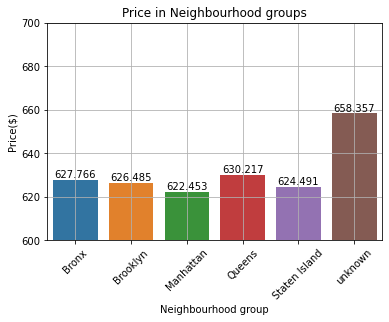

In [37]:
g1 = sns.barplot(x = nbd_groupby.index, y = nbd_groupby['price {$}'])
g1.bar_label(g1.containers[0])
plt.title('Price in Neighbourhood groups')
plt.xlabel('Neighbourhood group')
plt.ylabel('Price($)')
plt.xticks(rotation=45)
plt.grid()
g1.set_ylim(600,700);

Here, we can have an idea that Manhattan has the cheapest rentals followed by Staten Island, whereas, there are several unlisted areas with a very high rent. Let's check the density of rental category, i.e. type of house in each Neighborhood group.

### Room type-wise rental cost in each neighbourhood group

In [38]:
bronx_df = data_df[data_df['neighbourhood group'] == 'Bronx']

In [39]:
brook_df = data_df[data_df['neighbourhood group'] == 'Brooklyn']
manh_df = data_df[data_df['neighbourhood group'] == 'Manhattan']
queens_df = data_df[data_df['neighbourhood group'] == 'Queens']
staten_df = data_df[data_df['neighbourhood group'] == 'Staten Island']
ukn_df = data_df[data_df['neighbourhood group'] == 'unknown']

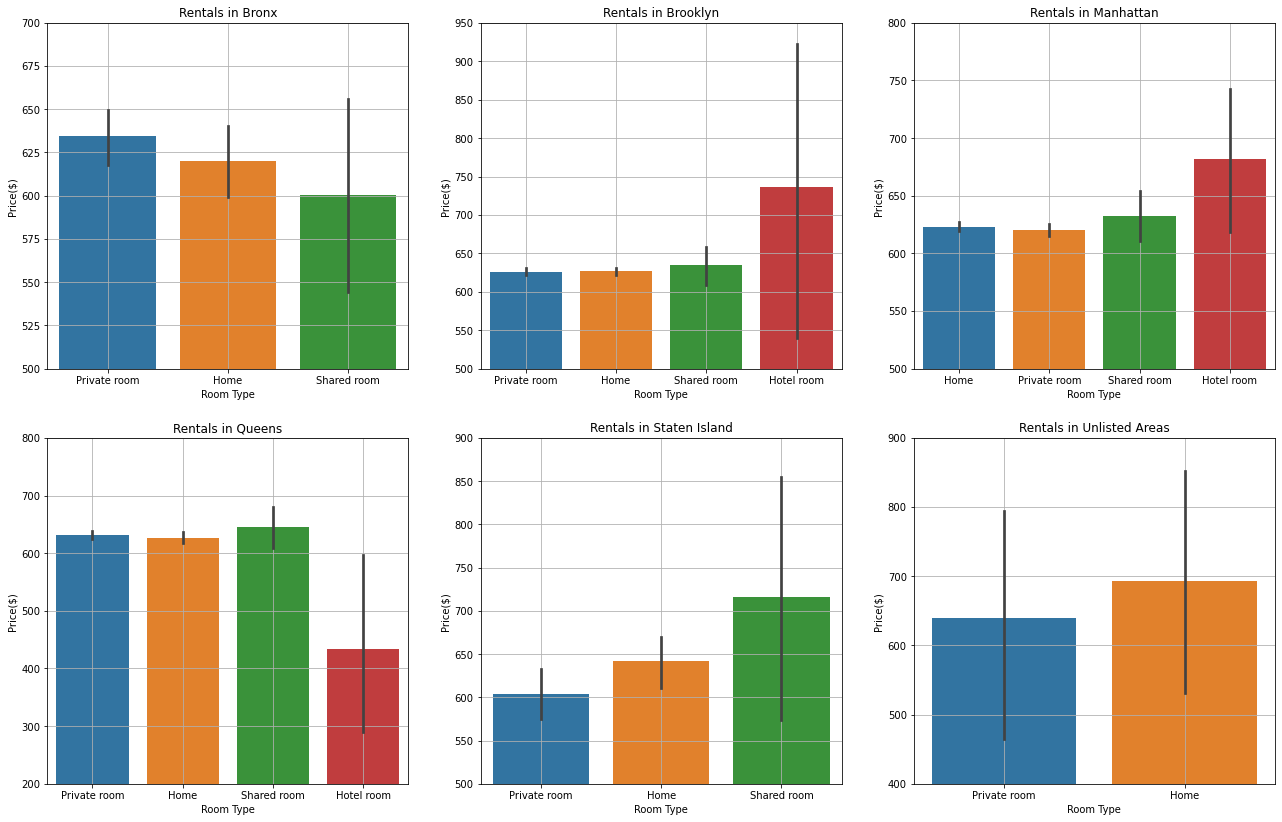

In [40]:
fig, axes = plt.subplots(2, 3, figsize=(22, 14))
# Bronx
sns.barplot(x = 'room type', y = 'price {$}', data = bronx_df, ax = axes[0,0]).set_ylim(500,700)
axes[0,0].set_xlabel('Room Type')
axes[0,0].grid(True)
axes[0,0].set_ylabel('Price($)')
axes[0,0].set_title('Rentals in Bronx');

# Brooklyn
sns.barplot(x = 'room type', y = 'price {$}', data = brook_df, ax = axes[0,1]).set_ylim(500,950)
axes[0,1].set_xlabel('Room Type')
axes[0,1].grid(True)
axes[0,1].set_ylabel('Price($)')
axes[0,1].set_title('Rentals in Brooklyn');

# Manhattan 
sns.barplot(x = 'room type', y = 'price {$}', data = manh_df, ax = axes[0,2]).set_ylim(500,800)
axes[0,2].set_xlabel('Room Type')
axes[0,2].grid(True)
axes[0,2].set_ylabel('Price($)')
axes[0,2].set_title('Rentals in Manhattan');

# Queens 
sns.barplot(x = 'room type', y = 'price {$}', data = queens_df, ax = axes[1,0]).set_ylim(200,800)
axes[1,0].set_xlabel('Room Type')
axes[1,0].grid(True)
axes[1,0].set_ylabel('Price($)')
axes[1,0].set_title('Rentals in Queens');

# Staten Island 
sns.barplot(x = 'room type', y = 'price {$}', data = staten_df, ax = axes[1,1]).set_ylim(500,900)
axes[1,1].set_xlabel('Room Type')
axes[1,1].grid(True)
axes[1,1].set_ylabel('Price($)')
axes[1,1].set_title('Rentals in Staten Island');

# Unlisted Areas
sns.barplot(x = 'room type', y = 'price {$}', data = ukn_df, ax = axes[1,2]).set_ylim(400,900)
axes[1,2].set_xlabel('Room Type')
axes[1,2].grid(True)
axes[1,2].set_ylabel('Price($)')
axes[1,2].set_title('Rentals in Unlisted Areas');

**Single bar-plot visualization of rental costs based on room types in neighbourhood groups**

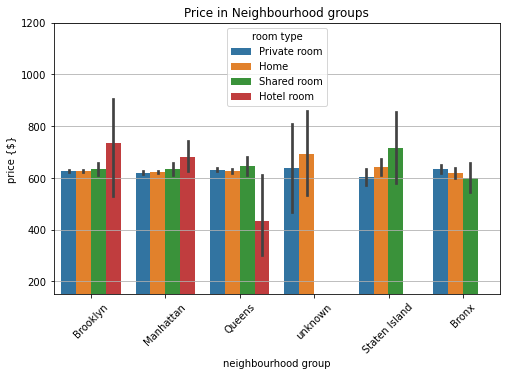

In [41]:
plt.figure(figsize = (8,5))
plt.title('Price in Neighbourhood groups')
plt.xlabel('Neighbourhood group')
plt.ylabel('Price($)')
plt.xticks(rotation=45)
plt.grid()
g2 = sns.barplot(x = 'neighbourhood group', y = 'price {$}', hue = 'room type', data = data_df)
g2.set_ylim(150,1200);

From these above subplot & single-plot visualization, we can make some inferences.

**_NOTE:_**<br />
Brooklyn has the highest rental rates for `Hotel rooms`, whereas, Queens has the cheapest hotels.<br />
`Home` & `Private room` are costlier in unlisted places. This says that in off-beat places, AirBnb might have a good rental business going on. <br />
`Private room` has more or less an average rent of \\$620 - \\$630 at every neighbourhood group.<br />
`Shared room` has high rental rate in Staten Island.

### Top 20 cheapest rentals in every neighbourhood group:

**20 cheap Private rooms around Bronx.** <br />
**AirBnb host status: both verified + unverified** 

In [42]:
bronx_df[bronx_df['room type'] == 'Private room'].sort_values(by = 'price {$}').head(20)

,id,NAME,host_identity_verified,neighbourhood group,neighbourhood,instant_bookable,cancellation_policy,room type,price {$},service fee {$},minimum nights
49273,28017643,The place is a brand new gut renovated apartment.,unconfirmed,Bronx,Kingsbridge,False,moderate,Private room,50.0,10.0,1.0
69087,38859292,"NO XTRA FEES, 30 min To Grand Central:Pvt Entr...",verified,Bronx,Wakefield,False,strict,Private room,54.0,11.0,1.0
45390,25873062,Quaint Private Room in Vibrant Bronx Neighborhood,verified,Bronx,Fordham,False,moderate,Private room,58.0,12.0,1.0
48991,27861894,Brand New Privated Room for NYC Traveler,verified,Bronx,Castle Hill,False,moderate,Private room,58.0,12.0,2.0
66427,37390174,The best on the bronx to 15 minutes of Manhattan,verified,Bronx,Fordham,False,strict,Private room,58.0,12.0,6.0
95259,53314087,Conveniently located to manhattan,verified,Bronx,Throgs Neck,False,strict,Private room,60.0,12.0,3.0
31933,18556192,Conveniently located to manhattan,unconfirmed,Bronx,Throgs Neck,True,flexible,Private room,60.0,12.0,3.0
5468,4021312,LL2,verified,Bronx,Clason Point,False,strict,Private room,61.0,12.0,2.0
38160,21879933,Bright and stylish bedroom 20min from Times Sq...,verified,Bronx,Mott Haven,False,flexible,Private room,62.0,12.0,1.0
61255,34635301,"Sunny, colorful duplex with many plants - 2 rooms",unconfirmed,Bronx,Longwood,True,strict,Private room,63.0,13.0,2.0


**20 cheap Private rooms around Bronx.<br />
AirBnb host status: verified**

In [43]:
d5 = bronx_df[(bronx_df['room type'] == 'Private room') & (bronx_df['host_identity_verified'] == 'verified')].sort_values(by = 'price {$}').head(20)
d5

,id,NAME,host_identity_verified,neighbourhood group,neighbourhood,instant_bookable,cancellation_policy,room type,price {$},service fee {$},minimum nights
69087,38859292,"NO XTRA FEES, 30 min To Grand Central:Pvt Entr...",verified,Bronx,Wakefield,False,strict,Private room,54.0,11.0,1.0
48991,27861894,Brand New Privated Room for NYC Traveler,verified,Bronx,Castle Hill,False,moderate,Private room,58.0,12.0,2.0
45390,25873062,Quaint Private Room in Vibrant Bronx Neighborhood,verified,Bronx,Fordham,False,moderate,Private room,58.0,12.0,1.0
66427,37390174,The best on the bronx to 15 minutes of Manhattan,verified,Bronx,Fordham,False,strict,Private room,58.0,12.0,6.0
95259,53314087,Conveniently located to manhattan,verified,Bronx,Throgs Neck,False,strict,Private room,60.0,12.0,3.0
5468,4021312,LL2,verified,Bronx,Clason Point,False,strict,Private room,61.0,12.0,2.0
38160,21879933,Bright and stylish bedroom 20min from Times Sq...,verified,Bronx,Mott Haven,False,flexible,Private room,62.0,12.0,1.0
69552,39116111,Kingstonian Room at Crocevia (Kro-Che-Via),verified,Bronx,Wakefield,True,moderate,Private room,63.0,13.0,1.0
55793,31618639,Cozy Private Room by Yankee Stadium. *Read Rules*,verified,Bronx,Concourse Village,False,strict,Private room,69.0,14.0,1.0
66408,37379680,unnamed,verified,Bronx,Norwood,True,strict,Private room,72.0,14.0,3.0


**20 cheap Private rooms around Brooklyn.<br />
AirBnb host status: both verified + unverified**

In [44]:
brook_df[brook_df['room type'] == 'Private room'].sort_values(by = 'price {$}').head(20)

,id,NAME,host_identity_verified,neighbourhood group,neighbourhood,instant_bookable,cancellation_policy,room type,price {$},service fee {$},minimum nights
93379,52275763,"Private Room, Very Cozy. Close to JFK. Garden!",verified,Brooklyn,Cypress Hills,False,flexible,Private room,50.0,10.0,1.0
25339,14914325,Spacious bedroom with private entrance + roofdeck,verified,Brooklyn,Bedford-Stuyvesant,True,moderate,Private room,50.0,10.0,2.0
28456,16635844,Sunny bedroom on Bed-Stuy/Bushwick boarder,verified,Brooklyn,Bedford-Stuyvesant,False,moderate,Private room,50.0,10.0,10.0
10010,6460822,Zen Private Bedroom in Brooklyn Gem,verified,Brooklyn,Fort Hamilton,True,strict,Private room,50.0,10.0,1.0
23461,13889809,"Bright, Beautiful & Welcoming in Williamsburg",verified,Brooklyn,Williamsburg,True,moderate,Private room,50.0,10.0,1.0
69509,39092362,Large room + office in Bushwick artists' loft,verified,Brooklyn,Bushwick,False,strict,Private room,50.0,10.0,3.0
28791,16820865,Spacious Bed & Private Bath in Renovated Townh...,verified,Brooklyn,Crown Heights,True,moderate,Private room,50.0,10.0,2.0
2461,2360546,Stuyvesant Heights Apt mins 2 City,verified,Brooklyn,Bedford-Stuyvesant,False,flexible,Private room,50.0,10.0,3.0
8495,5693125,Private Room in Williamsburg Apt,unconfirmed,Brooklyn,Williamsburg,False,strict,Private room,50.0,10.0,2.0
4674,3582786,Private room in Williamsburg apt,verified,Brooklyn,Williamsburg,True,strict,Private room,50.0,10.0,5.0


**20 cheap Private rooms around Brooklyn.<br />
AirBnb host status: verified**

In [45]:
d4 = brook_df[(brook_df['room type'] == 'Private room') & (brook_df['host_identity_verified'] == 'verified')].sort_values(by = 'price {$}').head(20)
d4

,id,NAME,host_identity_verified,neighbourhood group,neighbourhood,instant_bookable,cancellation_policy,room type,price {$},service fee {$},minimum nights
41913,23952715,A Sweet Retreat in Bedstuy,verified,Brooklyn,Bedford-Stuyvesant,True,moderate,Private room,50.0,10.0,3.0
25339,14914325,Spacious bedroom with private entrance + roofdeck,verified,Brooklyn,Bedford-Stuyvesant,True,moderate,Private room,50.0,10.0,2.0
82896,46486003,Spacious bedroom with private entrance + roofdeck,verified,Brooklyn,Bedford-Stuyvesant,False,flexible,Private room,50.0,10.0,2.0
4674,3582786,Private room in Williamsburg apt,verified,Brooklyn,Williamsburg,True,strict,Private room,50.0,10.0,5.0
23461,13889809,"Bright, Beautiful & Welcoming in Williamsburg",verified,Brooklyn,Williamsburg,True,moderate,Private room,50.0,10.0,1.0
72259,40611187,Zen Private Bedroom in Brooklyn Gem,verified,Brooklyn,Fort Hamilton,True,moderate,Private room,50.0,10.0,1.0
2461,2360546,Stuyvesant Heights Apt mins 2 City,verified,Brooklyn,Bedford-Stuyvesant,False,flexible,Private room,50.0,10.0,3.0
28456,16635844,Sunny bedroom on Bed-Stuy/Bushwick boarder,verified,Brooklyn,Bedford-Stuyvesant,False,moderate,Private room,50.0,10.0,10.0
10010,6460822,Zen Private Bedroom in Brooklyn Gem,verified,Brooklyn,Fort Hamilton,True,strict,Private room,50.0,10.0,1.0
28791,16820865,Spacious Bed & Private Bath in Renovated Townh...,verified,Brooklyn,Crown Heights,True,moderate,Private room,50.0,10.0,2.0


**20 cheap Private rooms around Manhattan.<br />
AirBnb host status: both verified + unverified**

In [46]:
manh_df[manh_df['room type'] == 'Private room'].sort_values(by = 'price {$}').head(20)

,id,NAME,host_identity_verified,neighbourhood group,neighbourhood,instant_bookable,cancellation_policy,room type,price {$},service fee {$},minimum nights
28954,16910890,Huge cozy artist haven in heart of Hamilton Hts.,unconfirmed,Manhattan,Harlem,False,flexible,Private room,50.0,10.0,2.0
44244,25240126,Absolutely Beautiful!,verified,Manhattan,Hell's Kitchen,False,flexible,Private room,50.0,10.0,6.0
63010,35555433,Beautiful King Bed Hotel Room,unconfirmed,Manhattan,Financial District,False,moderate,Private room,50.0,10.0,1.0
63009,35555433,Beautiful King Bed Hotel Room,unconfirmed,Manhattan,Financial District,False,moderate,Private room,50.0,10.0,1.0
66438,37396249,Hotel Room King Bed Times Square,verified,Manhattan,Midtown,False,moderate,Private room,50.0,NaN,145.0
17515,10605833,Cozy Little Italy Apartment,verified,Manhattan,Lower East Side,True,moderate,Private room,50.0,10.0,3.0
67949,38230774,Lofted Room in East Village NYC,verified,Manhattan,East Village,True,moderate,Private room,50.0,10.0,30.0
69475,39073584,"Cozy Getaway, steps from the Train, Stocked Fr...",verified,Manhattan,East Harlem,False,flexible,Private room,50.0,10.0,3.0
40733,23301001,TIME SQ WEST- 2 Bunk Beds for 4 People,unconfirmed,Manhattan,Hell's Kitchen,False,moderate,Private room,50.0,10.0,1.0
87753,49168524,Cozy Little Italy Apartment,unconfirmed,Manhattan,Lower East Side,True,strict,Private room,50.0,10.0,3.0


**20 cheap Private rooms around Manhattan.<br />
AirBnb host status: verified**

In [47]:
d3 = manh_df[(manh_df['room type'] == 'Private room') & (manh_df['host_identity_verified'] == 'verified')].sort_values(by = 'price {$}').head(20)
d3

,id,NAME,host_identity_verified,neighbourhood group,neighbourhood,instant_bookable,cancellation_policy,room type,price {$},service fee {$},minimum nights
67949,38230774,Lofted Room in East Village NYC,verified,Manhattan,East Village,True,moderate,Private room,50.0,10.0,30.0
17515,10605833,Cozy Little Italy Apartment,verified,Manhattan,Lower East Side,True,moderate,Private room,50.0,10.0,3.0
360,1200164,"MANHATTAN Neat, Nice, Bright ROOM",verified,Manhattan,Washington Heights,False,flexible,Private room,50.0,10.0,2.0
66438,37396249,Hotel Room King Bed Times Square,verified,Manhattan,Midtown,False,moderate,Private room,50.0,NaN,145.0
45045,25682518,Hamilton Heights is fancy!,verified,Manhattan,Harlem,False,strict,Private room,50.0,10.0,3.0
69475,39073584,"Cozy Getaway, steps from the Train, Stocked Fr...",verified,Manhattan,East Harlem,False,flexible,Private room,50.0,10.0,3.0
14176,8761703,"Nice private room, 2 blocks from Times Square.",verified,Manhattan,Hell's Kitchen,True,strict,Private room,50.0,10.0,2.0
44244,25240126,Absolutely Beautiful!,verified,Manhattan,Hell's Kitchen,False,flexible,Private room,50.0,10.0,6.0
76852,43147901,new sunshine room in chinatown train F is around,verified,Manhattan,Chinatown,False,flexible,Private room,51.0,10.0,1.0
89510,50138915,new sunshine room in chinatown train F is around,verified,Manhattan,Chinatown,True,flexible,Private room,51.0,10.0,1.0


**20 cheap Private rooms around Queens.<br />
AirBnb host status: both verified + unverified**

In [48]:
queens_df[queens_df['room type'] == 'Private room'].sort_values(by = 'price {$}').head(20)

,id,NAME,host_identity_verified,neighbourhood group,neighbourhood,instant_bookable,cancellation_policy,room type,price {$},service fee {$},minimum nights
61514,34778347,Esmeralda Room,verified,Queens,South Ozone Park,False,flexible,Private room,50.0,10.0,1.0
92749,51927814,cozy has 55 tv dressers living room has own he...,verified,Queens,East Elmhurst,True,flexible,Private room,50.0,10.0,1.0
69573,39127710,"Cozy basement with open design, separate entrance",verified,Queens,St. Albans,False,strict,Private room,50.0,10.0,1.0
29423,17169919,cozy has 55 tv dressers living room has own he...,verified,Queens,East Elmhurst,False,flexible,Private room,50.0,10.0,1.0
19601,11757931,Cute room for rent,unconfirmed,Queens,Maspeth,False,strict,Private room,50.0,10.0,1.0
45908,26159153,Comfortable double room with balcony(舒适双人房带阳台),unconfirmed,Queens,Flushing,True,moderate,Private room,50.0,10.0,1.0
89839,50320621,Cute room for rent,unconfirmed,Queens,Maspeth,False,moderate,Private room,50.0,10.0,1.0
77181,43329608,Cute room for rent,verified,Queens,Maspeth,True,moderate,Private room,50.0,10.0,1.0
38979,22332267,Gorgeous Room in a renovated Woodside townhouse!,verified,Queens,Woodside,True,flexible,Private room,51.0,10.0,30.0
83810,46990805,Cozy Room in a Friendly House CLOSE TO SUBWAY,unconfirmed,Queens,Woodhaven,False,moderate,Private room,51.0,10.0,2.0


**20 cheap Private rooms around Queens.<br />
AirBnb host status: verified**

In [49]:
d2 = queens_df[(queens_df['room type'] == 'Private room') & (queens_df['host_identity_verified'] == 'verified')].sort_values(by = 'price {$}').head(20)
d2

,id,NAME,host_identity_verified,neighbourhood group,neighbourhood,instant_bookable,cancellation_policy,room type,price {$},service fee {$},minimum nights
61514,34778347,Esmeralda Room,verified,Queens,South Ozone Park,False,flexible,Private room,50.0,10.0,1.0
77181,43329608,Cute room for rent,verified,Queens,Maspeth,True,moderate,Private room,50.0,10.0,1.0
69573,39127710,"Cozy basement with open design, separate entrance",verified,Queens,St. Albans,False,strict,Private room,50.0,10.0,1.0
29423,17169919,cozy has 55 tv dressers living room has own he...,verified,Queens,East Elmhurst,False,flexible,Private room,50.0,10.0,1.0
92749,51927814,cozy has 55 tv dressers living room has own he...,verified,Queens,East Elmhurst,True,flexible,Private room,50.0,10.0,1.0
26253,15419128,Cozy Room in a Friendly House CLOSE TO SUBWAY,verified,Queens,Woodhaven,True,strict,Private room,51.0,10.0,2.0
38979,22332267,Gorgeous Room in a renovated Woodside townhouse!,verified,Queens,Woodside,True,flexible,Private room,51.0,10.0,30.0
1219,1674590,YOU ROOM IN NYC,verified,Queens,Woodside,True,strict,Private room,53.0,11.0,2.0
69936,39328195,YOU ROOM IN NYC,verified,Queens,Woodside,True,moderate,Private room,53.0,11.0,2.0
73481,41286098,Cozy room in the heart of Astoria,verified,Queens,Astoria,False,moderate,Private room,53.0,11.0,2.0


**20 cheap Private rooms around Staten Island.<br />
AirBnb host status: both verified + unverified**

In [50]:
staten_df[staten_df['room type'] == 'Private room'].sort_values(by = 'price {$}').head(20)

,id,NAME,host_identity_verified,neighbourhood group,neighbourhood,instant_bookable,cancellation_policy,room type,price {$},service fee {$},minimum nights
53134,30150073,Close to NYC with No CLeaning Fees —-Q,unconfirmed,Staten Island,New Dorp Beach,True,flexible,Private room,50.0,10.0,2.0
62336,35232338,Private room w/Private Half bathroom,verified,Staten Island,Port Richmond,True,strict,Private room,50.0,10.0,5.0
40825,23351812,Park&walk2Boat! See LadyLiberty&DTNY all for f...,verified,Staten Island,St. George,False,strict,Private room,58.0,12.0,1.0
25722,15125856,Enjoy Manhattan without paying Manhattan prices,unconfirmed,Staten Island,St. George,False,strict,Private room,59.0,12.0,2.0
83279,46697533,Enjoy Manhattan without paying Manhattan prices,verified,Staten Island,St. George,False,strict,Private room,59.0,12.0,2.0
4325,3390034,New York City near Staten Is. Ferry,verified,Staten Island,St. George,False,flexible,Private room,65.0,13.0,2.0
76835,43138512,HugeTropical Bedrm near Ferry,unconfirmed,Staten Island,St. George,False,flexible,Private room,67.0,13.0,1.0
19255,11566835,HugeTropical Bedrm near Ferry,unconfirmed,Staten Island,St. George,False,moderate,Private room,67.0,13.0,1.0
98161,54916862,Staten Island Apartment,unconfirmed,Staten Island,Tompkinsville,True,strict,Private room,67.0,13.0,3.0
89493,50129526,HugeTropical Bedrm near Ferry,unconfirmed,Staten Island,St. George,False,moderate,Private room,67.0,13.0,1.0


**20 cheap Private rooms around Queens.<br />
AirBnb host status: verified**

In [51]:
d1 = staten_df[(staten_df['room type'] == 'Private room') & (staten_df['host_identity_verified'] == 'verified')].sort_values(by = 'price {$}').head(20)
d1

,id,NAME,host_identity_verified,neighbourhood group,neighbourhood,instant_bookable,cancellation_policy,room type,price {$},service fee {$},minimum nights
62336,35232338,Private room w/Private Half bathroom,verified,Staten Island,Port Richmond,True,strict,Private room,50.0,10.0,5.0
40825,23351812,Park&walk2Boat! See LadyLiberty&DTNY all for f...,verified,Staten Island,St. George,False,strict,Private room,58.0,12.0,1.0
83279,46697533,Enjoy Manhattan without paying Manhattan prices,verified,Staten Island,St. George,False,strict,Private room,59.0,12.0,2.0
4325,3390034,New York City near Staten Is. Ferry,verified,Staten Island,St. George,False,flexible,Private room,65.0,13.0,2.0
14004,8666708,Private Room For 1 w/ Separate Entrance Studen...,verified,Staten Island,Concord,False,moderate,Private room,77.0,15.0,4.0
97628,54622486,Happy home 2,verified,Staten Island,Randall Manor,True,moderate,Private room,79.0,16.0,1.0
89740,50265944,"Private Loft-style Bedroom & En-suite in S.I., NY",verified,Staten Island,Randall Manor,False,flexible,Private room,84.0,17.0,2.0
28393,16601050,A happy home,verified,Staten Island,Randall Manor,False,strict,Private room,88.0,18.0,1.0
16097,9822672,Cherry Hill House - Plum Room,verified,Staten Island,St. George,False,moderate,Private room,88.0,18.0,1.0
86335,48385362,Cherry Hill House - Plum Room,verified,Staten Island,St. George,True,moderate,Private room,88.0,18.0,1.0


#### Verified AirBnb rentals and their service fee charges in a single plot:

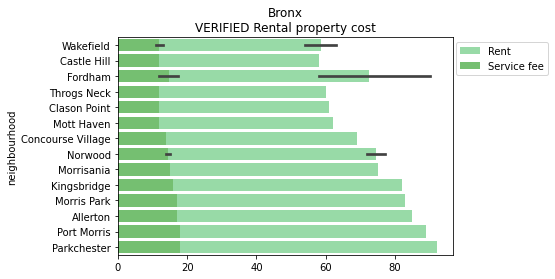

In [52]:
# Bronx
plt.title('Bronx\nVERIFIED Rental property cost')
sns.set_color_codes("pastel")
sns.barplot(x = 'price {$}', y = 'neighbourhood', data = d5, label = 'Rent', color = 'g')
sns.set_color_codes("muted")
sns.barplot(x = 'service fee {$}', y = 'neighbourhood', data = d5, label = 'Service fee', color = 'g')
plt.xlabel("")
plt.legend(bbox_to_anchor=(1.3, 1),loc="upper right", frameon=True);

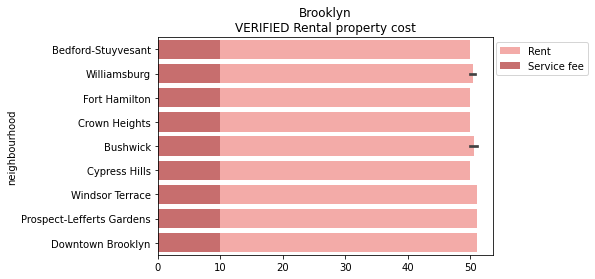

In [53]:
# Brooklyn 
plt.title('Brooklyn\nVERIFIED Rental property cost')
sns.set_color_codes("pastel")
sns.barplot(x = 'price {$}', y = 'neighbourhood', data = d4, label = 'Rent', color = 'r')
sns.set_color_codes("muted")
sns.barplot(x = 'service fee {$}', y = 'neighbourhood', data = d4, label = 'Service fee', color = 'r')
plt.xlabel("")
plt.legend(bbox_to_anchor=(1.3, 1), loc="upper right", frameon=True);

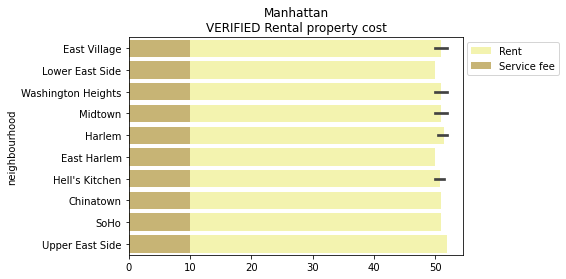

In [54]:
# Manhattan 
plt.title('Manhattan\nVERIFIED Rental property cost')
sns.set_color_codes("pastel")
sns.barplot(x = 'price {$}', y = 'neighbourhood', data = d3, label = 'Rent', color = 'y')
sns.set_color_codes("muted")
sns.barplot(x = 'service fee {$}', y = 'neighbourhood', data = d3, label = 'Service fee', color = 'y')
plt.xlabel("")
plt.legend(bbox_to_anchor=(1.3, 1), loc="upper right", frameon=True);

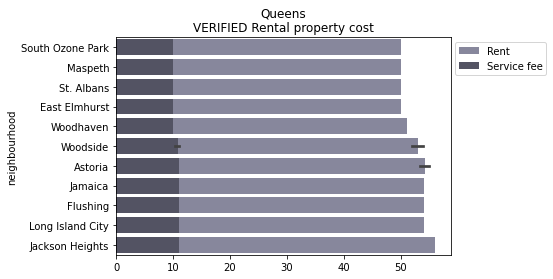

In [55]:
# Queens 
plt.title('Queens\nVERIFIED Rental property cost')
sns.set_color_codes("pastel")
sns.barplot(x = 'price {$}', y = 'neighbourhood', data = d2, label = 'Rent', color = '#84849f')
sns.set_color_codes("muted")
sns.barplot(x = 'service fee {$}', y = 'neighbourhood', data = d2, label = 'Service fee', color = '#505066')
plt.xlabel("")
plt.legend(bbox_to_anchor=(1.3, 1), loc="upper right", frameon=True);

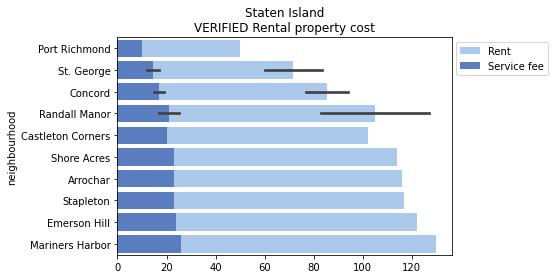

In [56]:
plt.title('Staten Island\nVERIFIED Rental property cost')
sns.set_color_codes("pastel")
sns.barplot(x = 'price {$}', y = 'neighbourhood', data = d1, label = 'Rent', color = 'b')
sns.set_color_codes("muted")
sns.barplot(x = 'service fee {$}', y = 'neighbourhood', data = d1, label = 'Service fee', color = 'b')
plt.xlabel("")
plt.legend(bbox_to_anchor=(1.3, 1), loc="upper right", frameon=True);

### Pie chart to show availability:

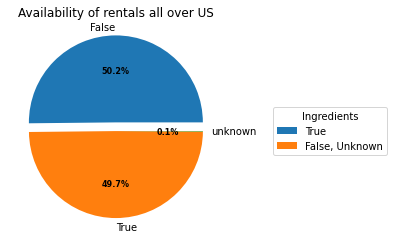

In [57]:
us_availability_df = pd.DataFrame(data_df['instant_bookable'].value_counts())
fig1, ax1 = plt.subplots()
ax1.set_title('Availability of rentals all over US')
wedges1, text1, autotexts1 = ax1.pie(us_availability_df.instant_bookable, explode = (0.1,0,0), labels = us_availability_df.index, autopct='%1.1f%%')
ax1.legend(wedges1, ['True', 'False, Unknown'], title="Ingredients", loc="center left", bbox_to_anchor=(1.2, 0, 0.5, 1))
plt.setp(autotexts1, size=8, weight="bold")
plt.show()

This pie chart gives us an idea that if somebody visits US, they should have a good planning about their stay since there's an almost 50-50 chance of getting a AirBnb rental on immediate notice.

**Let us check each neighbourhood group about their availability:**<br />
This will help is to decide which place has the highest chances of getting a rented property on immediate notice.

In [58]:
bronx_avail = pd.DataFrame(bronx_df['instant_bookable'].value_counts())
brook_avail = pd.DataFrame(brook_df['instant_bookable'].value_counts())
manh_avail = pd.DataFrame(manh_df['instant_bookable'].value_counts())
queens_avail = pd.DataFrame(queens_df['instant_bookable'].value_counts())
staten_avail = pd.DataFrame(staten_df['instant_bookable'].value_counts())

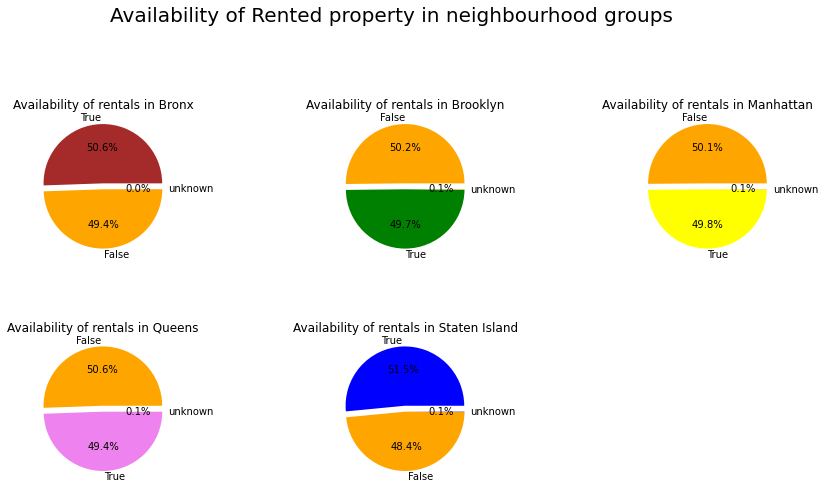

In [59]:
plt.figure(figsize = (15,15))
plt.suptitle('Availability of Rented property in neighbourhood groups', fontsize = 20)
# subplot2grid is used instead of subplots() because there are odd number of graphs needed.
ax1 = plt.subplot2grid((4, 3), (0, 0))
ax2 = plt.subplot2grid((4, 3), (0, 1))
ax3 = plt.subplot2grid((4, 3), (0, 2))
ax4 = plt.subplot2grid((4, 3), (1, 0))
ax5 = plt.subplot2grid((4, 3), (1, 1))
plt.subplots_adjust(wspace = 0.3, hspace = 0.5) #make the figure look better

# Bronx
ax1.set_title('Availability of rentals in Bronx')
ax1.pie(bronx_avail.instant_bookable, explode = (0.1,0,0), labels = bronx_avail.index, autopct='%1.1f%%', colors = ( "brown", "orange"))

# Brooklyn
ax2.set_title('Availability of rentals in Brooklyn')
ax2.pie(brook_avail.instant_bookable, explode = (0.1,0,0), labels = brook_avail.index, autopct='%1.1f%%', colors = ( "orange", "green"))

# Manhattan
ax3.set_title('Availability of rentals in Manhattan')
ax3.pie(manh_avail.instant_bookable, explode = (0.1,0,0), labels = manh_avail.index, autopct='%1.1f%%', colors = ( "orange", "yellow"))

# Queens
ax4.set_title('Availability of rentals in Queens')
ax4.pie(queens_avail.instant_bookable, explode = (0.1,0,0), labels = queens_avail.index, autopct='%1.1f%%', colors = ( "orange", "violet"))

# Staten Island
ax5.set_title('Availability of rentals in Staten Island')
ax5.pie(staten_avail.instant_bookable, explode = (0.1,0,0), labels = staten_avail.index, autopct='%1.1f%%', colors = ( "blue", "orange"))

plt.show()

From this above set of Pie charts, it's clearly understandable that almost neighbourhood groups in US has 50-50 chance of immediate availability. Though, we see that there are better odds in finding a rented property in Staten Island.

Let us check the density of property types in these 5 regions.

### Pie Chart to show property types:

In [60]:
bronx_rooms = pd.DataFrame(bronx_df['room type'].value_counts())
brook_rooms = pd.DataFrame(brook_df['room type'].value_counts())
manh_rooms = pd.DataFrame(manh_df['room type'].value_counts())
queens_rooms = pd.DataFrame(queens_df['room type'].value_counts())
staten_rooms = pd.DataFrame(staten_df['room type'].value_counts())

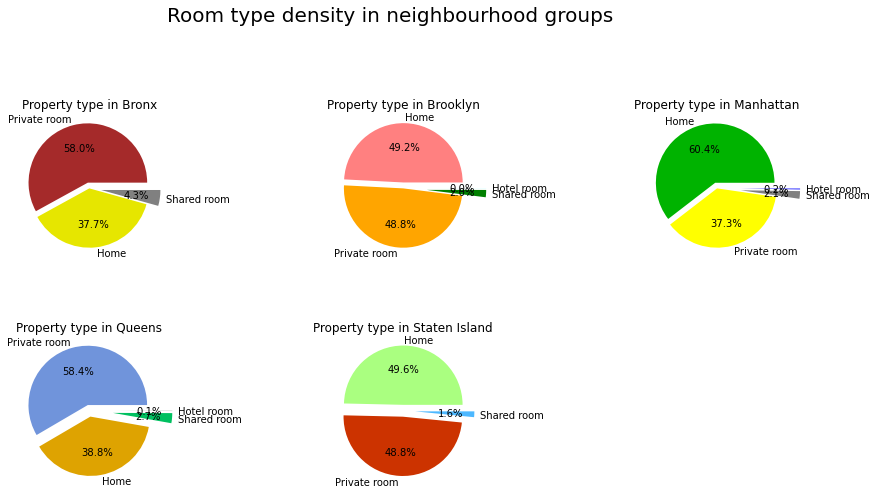

In [61]:
plt.figure(figsize = (15,15))
plt.suptitle('Room type density in neighbourhood groups', fontsize = 20)
ax1 = plt.subplot2grid((4, 3), (0, 0))
ax2 = plt.subplot2grid((4, 3), (0, 1))
ax3 = plt.subplot2grid((4, 3), (0, 2))
ax4 = plt.subplot2grid((4, 3), (1, 0))
ax5 = plt.subplot2grid((4, 3), (1, 1))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5) #make the figure look better

# Bronx
ax1.set_title('Property type in Bronx')
ax1.pie(bronx_rooms['room type'], explode = (0.1,0,0.2), labels = bronx_rooms.index, autopct='%1.1f%%', colors = ( "brown", "#e6e600", "grey"))

# Brooklyn
ax2.set_title('Property type in Brooklyn')
ax2.pie(brook_rooms['room type'], explode = (0.1,0,0.4,0.4), labels = brook_rooms.index, autopct='%1.1f%%', colors = ( "#ff8080", "orange", "green", "cyan"))

# Manhattan
ax3.set_title('Property type in Manhattan')
ax3.pie(manh_rooms['room type'], explode = (0.1,0,0.4,0.4), labels = manh_rooms.index, autopct='%1.1f%%', colors = ( "#00b300", "yellow", "grey", "blue"))

# Queens
ax4.set_title('Property type in Queens')
ax4.pie(queens_rooms['room type'], explode = (0.1,0.1,0.4,0.4), labels = queens_rooms.index, autopct='%1.1f%%', colors = ( "#7094db", "#dea301", "#00C060", "grey"))

# Staten Island
ax5.set_title('Property type in Staten Island')
ax5.pie(staten_rooms['room type'], explode = (0.1,0.1,0.2), labels = staten_rooms.index, autopct='%1.1f%%', colors = ( "#aaff80", "#cc3300", "#4db8ff"))

plt.show()

Colors taken from [Color picker](https://www.color-hex.com/)<br />
Private rooms and Home has the highest density in every neighbourhood.<br /> It's clearly visible that Hotel & Shared Rooms has less availability. 

### Let us figure out the average cost of renting Private rooms and Home in each neighbourhood group:

In [103]:
bronx_pvt_avg = list(bronx_df[bronx_df['room type'] == 'Private room'][['price {$}']].mean().values)[0]
bronx_home_avg = list(bronx_df[bronx_df['room type'] == 'Home'][['price {$}']].mean().values)[0]
brook_pvt_avg = list(brook_df[brook_df['room type'] == 'Private room'][['price {$}']].mean().values)[0]
brook_home_avg = list(brook_df[brook_df['room type'] == 'Home'][['price {$}']].mean().values)[0]
manh_pvt_avg = list(manh_df[manh_df['room type'] == 'Private room'][['price {$}']].mean().values)[0]
manh_home_avg = list(manh_df[manh_df['room type'] == 'Home'][['price {$}']].mean().values)[0]
queens_pvt_avg = list(queens_df[queens_df['room type'] == 'Private room'][['price {$}']].mean().values)[0]
queens_home_avg = list(queens_df[queens_df['room type'] == 'Home'][['price {$}']].mean().values)[0]
staten_pvt_avg = list(staten_df[staten_df['room type'] == 'Private room'][['price {$}']].mean().values)[0]
staten_home_avg = list(staten_df[staten_df['room type'] == 'Home'][['price {$}']].mean().values)[0]

In [114]:
avg_dict = {'Type' : ['Private Rooms', 'Home'],
            'Bronx' : [bronx_pvt_avg,bronx_home_avg],
            'Brooklyn' : [brook_pvt_avg,brook_home_avg],
            'Manhattan' : [manh_pvt_avg,manh_home_avg],
            'Queens' : [queens_pvt_avg,queens_home_avg],
            'Staten Island' : [staten_pvt_avg,staten_home_avg]}
avg_df = pd.DataFrame(avg_dict)
avg_df.set_index('Type', inplace = True)

**The average cost of rentals in each neighbourhood group:**

In [118]:
avg_df

,Bronx,Brooklyn,Manhattan,Queens,Staten Island
Type,,,,,
Private Rooms,634.710644,625.790176,620.387012,631.833247,603.500000
Home,620.232581,626.818514,623.157440,627.024951,642.192389
